In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,9)
path = "../../data/"

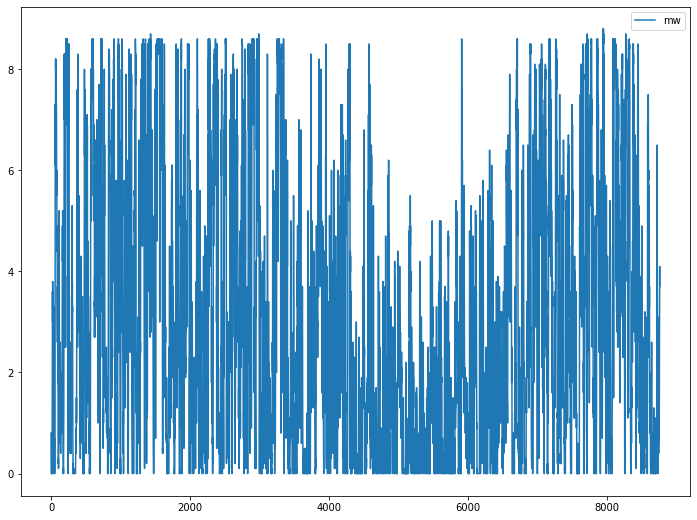

In [2]:
wind17 = read_csv(path+"railsplitter_data2017.csv", usecols=['mw'])
wind17.plot()

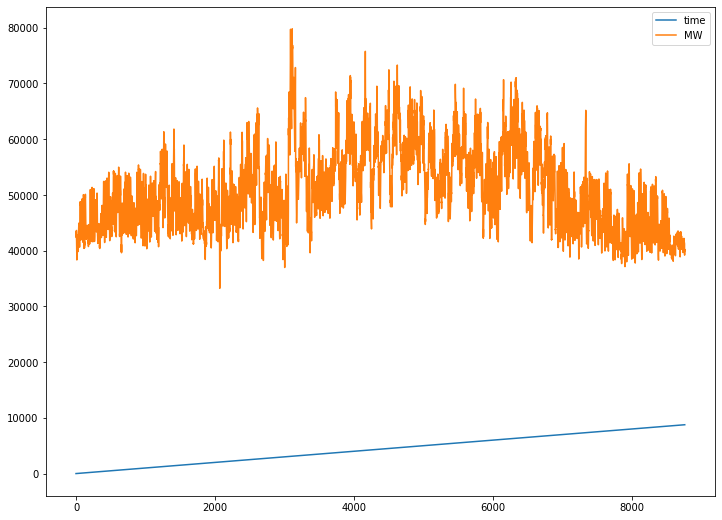

In [15]:
demand17 = read_csv(path+"annual_load2017.csv", usecols=['time', 'kw'])
demand17.rename(columns={'kw':'MW'}, inplace=True)
demand17.plot()

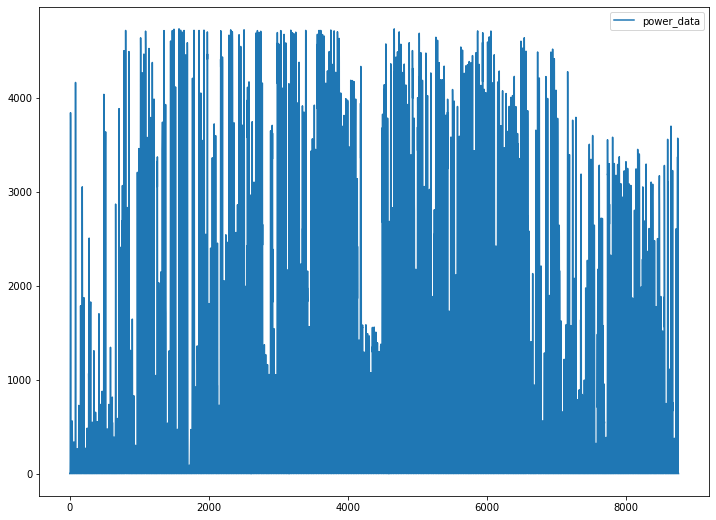

In [4]:
solar17 = read_csv(path+"annual_sun2017.csv", usecols=['power_data'])
solar17.plot()

In [18]:
demand17.MW = demand17.MW/1000
solar17.power_data = solar17.power_data/1000

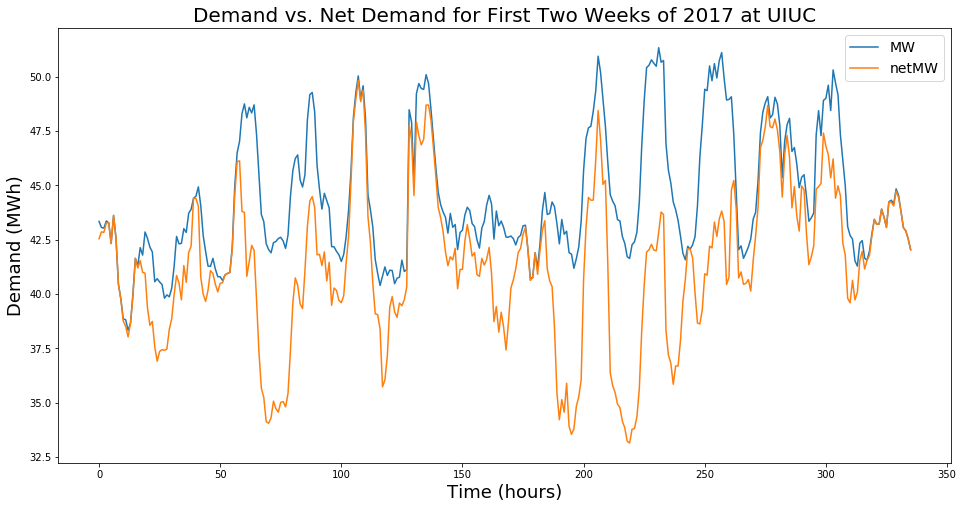

In [26]:
plt.rcParams['figure.figsize'] = (16,8)
demand17['netMW'] = demand17.MW - solar17.power_data - wind17.mw
mask = demand17.time < 336
ax = demand17[['MW','netMW']].loc[mask].plot()
ax.set_xlabel('Time (hours)', fontsize=18)
ax.set_ylabel('Demand (MWh)', fontsize=18)
ax.set_title("Demand vs. Net Demand for First Two Weeks of 2017 at UIUC", fontsize=20)
plt.legend(fontsize=14)